# Review of Supervised Learning with scikit-learn

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read data.
# you can find a description in data/bank-campaign-desc.txt
data = pd.read_csv("data/bank-campaign.csv")

In [4]:
data.shape

(41188, 64)

In [5]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [6]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [7]:
y = data.target

In [8]:
X = data.drop("target", axis=1)

In [9]:
X.shape

(41188, 63)

In [10]:
y.shape

(41188,)

In [11]:
y

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
41158    yes
41159    yes
41160    yes
41161     no
41162     no
41163    yes
41164    yes
41165    yes
41166    yes
41167     no
41168     no
41169     no
41170     no
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
41176     no
41177     no
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: target, Length: 41188, dtype: object

In [12]:
data.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

In [13]:
data.target.value_counts() / data.target.size

no     0.887346
yes    0.112654
Name: target, dtype: float64

Splitting the data:

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42, stratify=y)

In [18]:
np.sum(y_train == "yes") / len(y_train)

0.11265553869499241

In [19]:
np.sum(y_test == "yes") / len(y_test)

0.11264870114105366

In [20]:
# import model
from sklearn.linear_model import LogisticRegression
# instantiate model, set parameters
lr = LogisticRegression(C=0.1)
# fit model
lr.fit(X_train, y_train)

C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions:

In [21]:
lr.score(X_train, y_train)

0.9088619119878604

In [22]:
(y_train == "no").mean()

0.8873444613050075

In [23]:
lr.score(X_test, y_test)

0.9132070890992959

# Exercise
Load the dataset ``data/bike_day_raw.csv``, which has the regression target ``cnt``.
This dataset is hourly bike rentals in the citybike platform. The ``cnt`` column is the number of rentals, which we want to predict from date and weather data.

Split the data into a training and a test set using ``train_test_split``.
Use the ``LinearRegression`` class to learn a regression model on this data. You can evaluate with the ``score`` method, which provides the $R^2$ or using the ``mean_squared_error`` function from ``sklearn.metrics`` (or write it yourself in numpy).

In [ ]:
# %load solutions/bike_regression.py

In [79]:
# imports
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
# load dataset
dfBikes = pd.read_csv('data/bike_day_raw.csv')

In [27]:
# view data
dfBikes.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [28]:
# create X and y arrays
X = dfBikes.drop('cnt', axis=1)
y = dfBikes['cnt']

In [31]:
# split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
# create and train linear regression model
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# check train and test scores without preprocessing
print('WITHOUT PREPROCESSING')
print('\tTraining score: {}'.format(linearReg.score(X_train, y_train)))
print('\tTest score: {}'.format(linearReg.score(X_test, y_test)))

# results are bad, so I have to try to do some PREPROCESSING

WITHOUT PREPROCESSING
	Training score: 0.5328925529498699
	Test score: 0.4991033756876271


In [67]:
# PREPROCESSING
# OneHotEncoder - Transform categorical values -> add new feature for each category (values of new features are 0/1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [73]:
# train model with preprocessed data
linearRegPre = LinearRegression().fit(X_train_ohe, y_train)

In [74]:
# check train and test scores with preprocessing
print('WITH PREPROCESSING')
print('\tTraining score: {}'.format(linearRegPre.score(X_train_ohe, y_train)))
print('\tTest score: {}'.format(linearRegPre.score(X_test_ohe, y_test)))

WITH PREPROCESSING
	Training score: 0.4880281709027507
	Test score: 0.5429865687783371


In [70]:
# predictons without preprocessing
predictions = linearReg.predict(X_test)

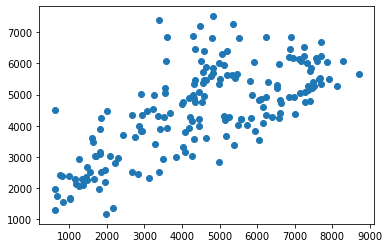

In [75]:
# plot predictions without preprocessing and results
plt.scatter(y_test, predictions)

# from this plot we can see that results aren't so good

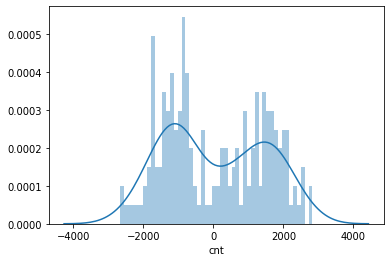

In [86]:
sns.distplot((y_test-predictions),bins=50)

In [80]:
# metrics without preprocessing
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1281.2033630747057
MSE: 2220717.2087004716
RMSE: 1490.207102620462


In [84]:
# predictons with preprocessing
predictionsPre = linearRegPre.predict(X_test_ohe)

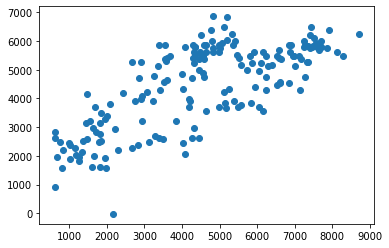

In [85]:
# plot predictions without preprocessing and results
plt.scatter(y_test, predictionsPre)

# from this plot we can see that results aren't so good

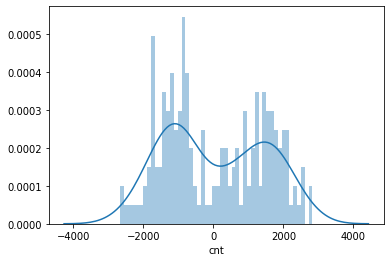

In [88]:
sns.distplot((y_test-predictionsPre),bins=50)

In [89]:
# metrics without preprocessing
print('MAE:', metrics.mean_absolute_error(y_test, predictionsPre))
print('MSE:', metrics.mean_squared_error(y_test, predictionsPre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsPre)))

MAE: 1275.6161202185792
MSE: 2026161.7708333333
RMSE: 1423.4330932057653
